In [5]:
import pandas as pd

In [6]:
predictions_df = pd.read_csv('/Users/tanmaysagarhuria/Downloads/GRU_predicted_ask_prices.csv')

In [7]:
df= pd.read_csv('/Users/tanmaysagarhuria/Downloads/filtered_data_mimed0101.csv')

In [30]:
df = pd.concat([df, predictions_df], axis=1)

In [31]:
print(df.head())

  Type  adjusted_time_ints    adjusted_time       Price  Volume Type  \
0  ask                 0.0  0 days 00:00:00  258.684211     2.0  ask   
1  ask                 1.0  0 days 00:01:00  254.000000     5.0  ask   
2  ask                 2.0  0 days 00:02:00  258.000000     1.0  ask   
3  ask                 3.0  0 days 00:03:00  259.000000     4.0  ask   
4  ask                 4.0  0 days 00:04:00  261.000000     2.0  ask   

   adjusted_time_minutes  pred_ask_price      MACD  Signal_Line  \
0                    1.0       120.79386  0.000000     0.000000   
1                    2.0       120.80364  0.000780     0.000156   
2                    3.0       120.81031  0.001915     0.000508   
3                    4.0       120.10011 -0.053873    -0.010368   
4                    5.0       120.03502 -0.102159    -0.028726   

   MACD_Buy_Signal  MACD_Sell_Signal    EMA_fast    EMA_slow  Buy_Signal  \
0            False             False  120.793860  120.793860       False   
1           

In [32]:
df.rename(columns={'ASK Price Predicted': 'pred_ask_price'}, inplace=True)

In [36]:
df.rename(columns={'BID Price Predicted': 'pred_bids_price'}, inplace=True)

In [37]:
df.fillna(method='ffill', inplace=True)

/var/folders/11/mvf3p5t161x6_9by0kd_xglr0000gn/T/ipykernel_59690/4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    df['EMA_fast'] = df['pred_ask_price'].ewm(span=fast_period, adjust=False).mean()
    df['EMA_slow'] = df['pred_ask_price'].ewm(span=slow_period, adjust=False).mean()
    df['MACD'] = df['EMA_fast'] - df['EMA_slow']
    df['Signal_Line'] = df['MACD'].ewm(span=signal_period, adjust=False).mean()

calculate_macd(df)

In [21]:
df['Buy_Signal'] = (df['MACD'] > df['Signal_Line']) & (df['MACD'].shift(1) <= df['Signal_Line'].shift(1))
df['Sell_Signal'] = (df['MACD'] < df['Signal_Line']) & (df['MACD'].shift(1) >= df['Signal_Line'].shift(1))

Buying at 120.80364 on index 1
Selling at 120.10011 on index 3
Buying at 119.804085 on index 19
Selling at 119.44506 on index 46
Buying at 119.22384 on index 63
Selling at 118.2182 on index 88
Buying at 117.703094 on index 102
Selling at 117.59756 on index 127
Buying at 117.65774 on index 128
Selling at 117.35752 on index 130
Buying at 116.751686 on index 149
Selling at 116.18412 on index 159
Buying at 116.66746 on index 162
Selling at 116.025 on index 182
Buying at 116.604034 on index 186
Selling at 116.64111 on index 203
Buying at 116.64513 on index 212
Selling at 116.153824 on index 215
Buying at 115.67592 on index 233
Selling at 115.50008 on index 249
Buying at 115.5818 on index 250
Selling at 115.27374 on index 251
Buying at 114.4392 on index 268
Selling at 113.00369 on index 283
Buying at 114.467705 on index 288
Selling at 114.13358 on index 301
Buying at 114.52133 on index 308
Selling at 114.713554 on index 325
Buying at 114.50145 on index 339
Selling at 113.88961 on index 344
B

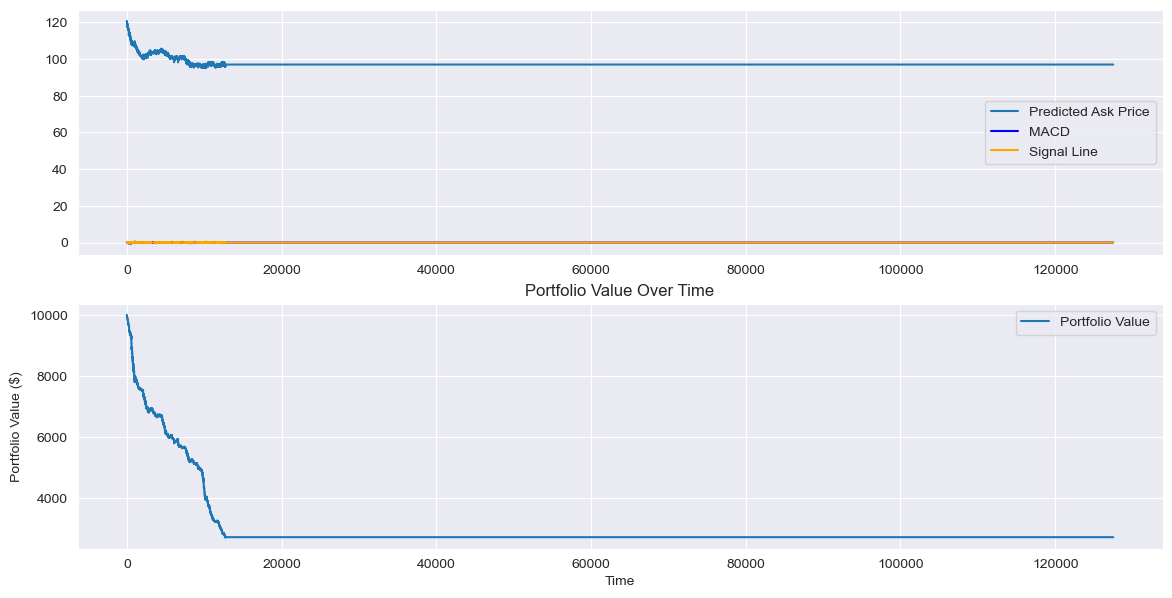

Final Portfolio Value: $2734.07
Total Profit/Loss: $-7265.93


In [22]:
initial_capital = 10000.0
capital = initial_capital
shares = 0
portfolio_values = []

# Simulate trading
for index, row in df.iterrows():
    if row['Buy_Signal'] and capital > 0:  # Buy if we have capital and a buy signal
        shares = capital / row['pred_ask_price']
        capital = 0  # All capital is converted into shares
        print(f"Buying at {row['pred_ask_price']} on index {index}")

    if row['Sell_Signal'] and shares > 0:  # Sell if we have shares and a sell signal
        capital = shares * row['pred_ask_price']
        shares = 0  # All shares are sold
        print(f"Selling at {row['pred_ask_price']} on index {index}")

    portfolio_value = capital + (shares * row['pred_ask_price'])
    portfolio_values.append(portfolio_value)

# Final values
final_portfolio_value = capital + (shares * df['pred_ask_price'].iloc[-1]) if shares > 0 else capital
profit = final_portfolio_value - initial_capital

# Plotting
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['pred_ask_price'], label='Predicted Ask Price')
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['Signal_Line'], label='Signal Line', color='orange')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(portfolio_values, label='Portfolio Value')
plt.legend()
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.show()

print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Total Profit/Loss: ${profit:.2f}")


In [23]:
# Final portfolio value: either from capital or by selling remaining shares at the last price
if shares > 0:
    final_portfolio_value = shares * df['pred_ask_price'].iloc[-1]  # sell all remaining shares
    shares = 0  # Now we have 0 shares
else:
    final_portfolio_value = capital 

# Calculate the profit or loss
profit = final_portfolio_value - initial_capital

# Output the final portfolio value and the profit
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Total Profit/Loss: ${profit:.2f}")


Final Portfolio Value: $2734.07
Total Profit/Loss: $-7265.93


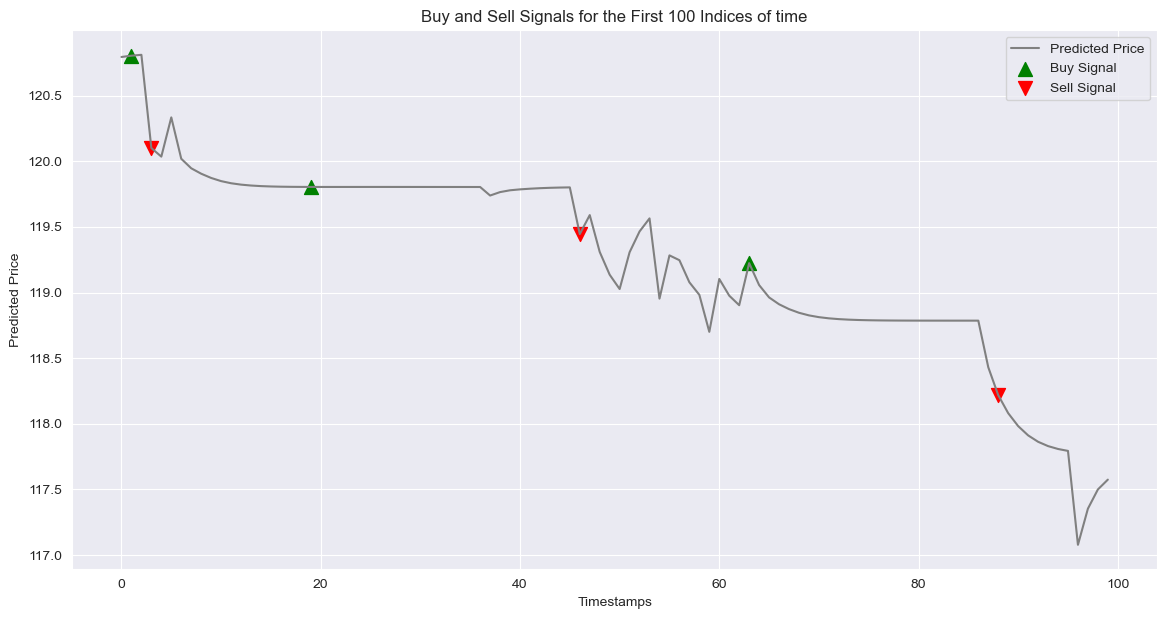

In [27]:
import matplotlib.pyplot as plt

subset = df.iloc[:100]

plt.figure(figsize=(14, 7))  # Set the figure size for better visibility

# Plot the predicted prices
plt.plot(subset.index, subset['pred_ask_price'], label='Predicted Price', color='gray')

# Highlight buy signals with green triangles
plt.scatter(subset.index[subset['Buy_Signal'] == 1], subset['pred_ask_price'][subset['Buy_Signal'] == 1], color='green', label='Buy Signal', marker='^', s=100)

# Highlight sell signals with red triangles
plt.scatter(subset.index[subset['Sell_Signal'] == 1], subset['pred_ask_price'][subset['Sell_Signal'] == 1], color='red', label='Sell Signal', marker='v', s=100)

plt.title('Buy and Sell Signals for the First 100 Indices of time')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
df_bids = predictions_df = pd.read_csv('/Users/tanmaysagarhuria/Downloads/GRU_predicted_combined_prices.csv') 

KeyError: 'pred_bid_price'

       Type  adjusted_time_ints     adjusted_time       Price     Volume Type  \
0       ask                 0.0   0 days 00:00:00  258.684211   2.000000  ask   
1       ask                 1.0   0 days 00:01:00  254.000000   5.000000  ask   
2       ask                 2.0   0 days 00:02:00  258.000000   1.000000  ask   
3       ask                 3.0   0 days 00:03:00  259.000000   4.000000  ask   
4       ask                 4.0   0 days 00:04:00  261.000000   2.000000  ask   
...     ...                 ...               ...         ...        ...  ...   
127495  bid             63745.0  44 days 06:25:00  112.000000   1.928571  ask   
127496  bid             63746.0  44 days 06:26:00  112.000000   2.600000  ask   
127497  bid             63747.0  44 days 06:27:00  113.000000   4.000000  ask   
127498  bid             63748.0  44 days 06:28:00  113.000000  10.000000  ask   
127499  bid             63749.0  44 days 06:29:00  112.000000   2.625000  ask   

        adjusted_time_minut